In [58]:
#Telco Churn Analysis
#importing libaries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from imblearn.combine import SMOTEENN
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [25]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [28]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [29]:

data.Churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [30]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:

#dealing with missing values
def miss_val_info(data):

 missing_count = data.isnull().sum().sort_values(ascending = False)
 missing_percent = round(missing_count / len(data) * 100, 2)
 missing_info = pd.concat([missing_count, missing_percent], axis = 1, keys=['Missing Value Count','Percent of missing values'])
 return missing_info[missing_info['Missing Value Count'] != 0]


In [32]:

data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [33]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X = data_dummies.drop(columns = ['Churn']) # input features
Y = data_dummies.Churn  # output feature

from sklearn.model_selection import train_test_split

# Split randomly into 70% train data and 30% test data
X_train, X_Test, Y_train, Y_Test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

<ipython-input-35-fd16288307cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="Paired")


<Axes: >

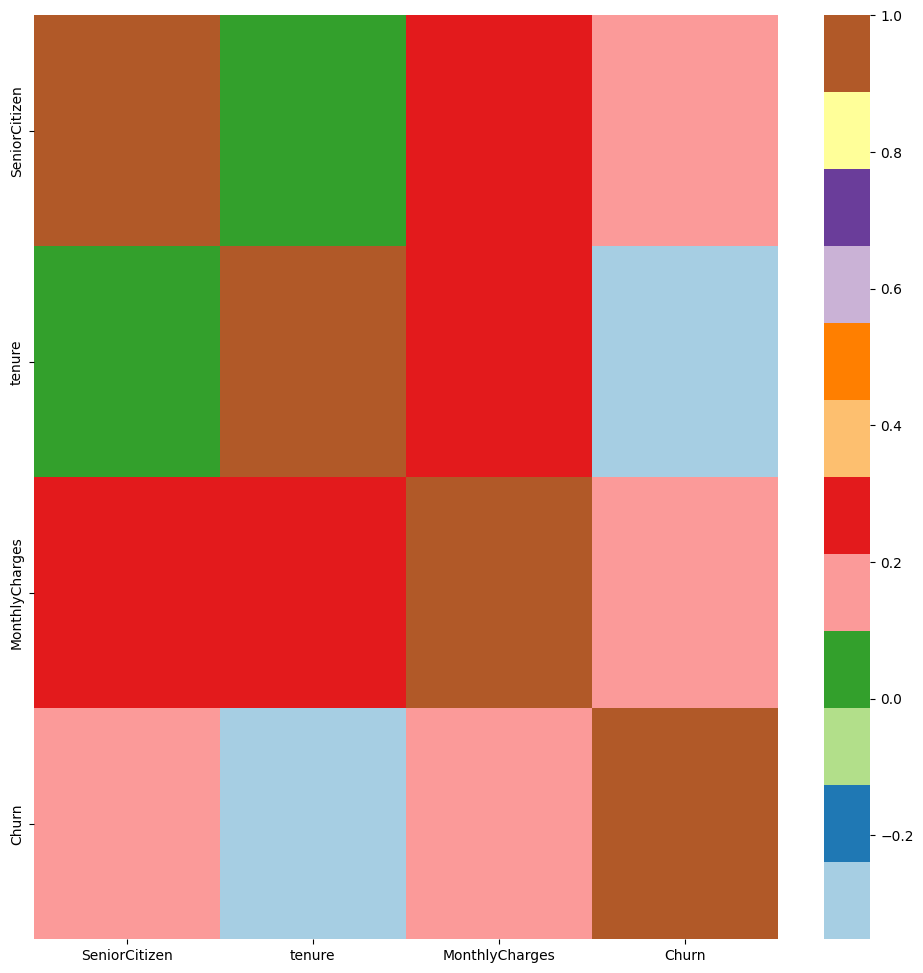

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), cmap="Paired")

In [36]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')

In [37]:

rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [38]:
rfc.score(X_Test, Y_Test)

0.7799337434926644

In [39]:
#Feature selection
from sklearn.feature_selection import SelectKBest, f_classif

In [40]:

selector = SelectKBest(f_classif, k=10)

In [41]:
X_new = selector.fit_transform(X, Y)

In [42]:


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.2, random_state = 42)

In [43]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [44]:
rfc.score(X_test, Y_test)

0.758694109297374

In [45]:
#cross validation
from sklearn.model_selection import cross_validate

In [46]:

cv_results = cross_validate(rfc, X_new, Y, cv=10, scoring=["accuracy", "precision", "recall"])
cv_results

{'fit_time': array([0.87257791, 0.74551225, 0.53025723, 0.54276347, 0.5307889 ,
        0.64600801, 0.62271523, 0.59508824, 0.61434913, 0.63288188]),
 'score_time': array([0.03638196, 0.02428818, 0.02469349, 0.02742696, 0.02453017,
        0.04678941, 0.02734327, 0.02722716, 0.02723169, 0.02913499]),
 'test_accuracy': array([0.76879433, 0.76879433, 0.77730496, 0.78835227, 0.75      ,
        0.74289773, 0.76846591, 0.75994318, 0.75852273, 0.76136364]),
 'test_precision': array([0.56521739, 0.56521739, 0.58064516, 0.5978836 , 0.53038674,
        0.51666667, 0.56666667, 0.55421687, 0.54404145, 0.55026455]),
 'test_recall': array([0.55614973, 0.55614973, 0.57754011, 0.60752688, 0.51336898,
        0.4973262 , 0.54545455, 0.49197861, 0.56149733, 0.55614973])}

In [47]:
print("Accuracy: ", cv_results["test_accuracy"].mean())

Accuracy:  0.7644439071566732


In [48]:
#Hyper parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [49]:
# Different parameters in random forest

criterion = ['gini', 'entropy']
n_estimators = [100, 200, 300]

max_features = ['auto', 'sqrt']
max_depth = [10, 20]
max_depth.append(None)
params = {'criterion': criterion,
'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth}

In [50]:
gs = GridSearchCV(rfc, param_grid=params, n_jobs=2)

In [51]:
gs.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [52]:
gs.best_score_

0.785587099153508

In [53]:
gs.score(X_test, Y_test)

0.794889992902768

In [54]:
#smottening the model
sm = SMOTEENN()
X_resampled1, Y_resampled1 = sm.fit_resample(X,Y)
Xr_train1,Xr_test1,Yr_train1,Yr_test1=train_test_split(X_resampled1, Y_resampled1,test_size=0.2)
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf_smote.fit(Xr_train1,Yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [59]:
Yr_predict1 = model_rf_smote.predict(Xr_test1)
model_score_r1 = model_rf_smote.score(Xr_test1, Yr_test1)
print(model_score_r1)
print(metrics.classification_report(Yr_test1, Yr_predict1))

0.6569395017793594
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       482
           1       0.66      1.00      0.79       923

    accuracy                           0.66      1405
   macro avg       0.33      0.50      0.40      1405
weighted avg       0.43      0.66      0.52      1405



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
